<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Text_mining_%26_NLP_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text mining & NLP - Part 1

##1 Libraries
Several libraries are requested to perform text mining and NLP with Python.

In [ ]:
#lib
import requests
import pandas as pd
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import spacy #lemmatisation
from nltk.stem.snowball import FrenchStemmer

from wordcloud import WordCloud

And some corpus of words and symbols are requested too.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## 2 Data
In NLP, data is basically a text : one word, one sentence, several sentences, a whole book, ...

In [ ]:
#data
data = "Merci pour ce MOOC, c'était passionnant et vraiment inspirant ;)"

## 3 Preprocessing
A major step in NLP fields is the preprocessing.  
Without it our data is pretty poor of valuable information, full of noise and need to be denoised by a proper preprocessing step.

### 3.1 Lowerisation
A first and simple task is to get lower (or upper if you prefer) your data.

In [ ]:
data.lower()

"merci pour ce mooc, c'était passionnant et vraiment inspirant ;)"

### 3.2 Tokenisation
Tokenisation means divide the data into basic unit, unit may be a single word most of the time.  
Tokenisation is made with `word_tokenize()` function from `nltk`.

In [ ]:
word_tokenize(data)

['Merci',
 'pour',
 'ce',
 'MOOC',
 ',',
 "c'était",
 'passionnant',
 'et',
 'vraiment',
 'inspirant',
 ';',
 ')']

### 3.3 Punctuation removing
Punctuations don't bring useful information to our text.  
Punctuation removing may be made with `isalnum()` function.

In [ ]:
[w for w in word_tokenize(data) if w.isalnum()]

['Merci', 'pour', 'ce', 'MOOC', 'passionnant', 'et', 'vraiment', 'inspirant']

### 3.4 Stopwords removing
Stopwords are all words that don't bring useful information to our text.  
Stopwords are present everywhere, in every text data, and get noisy our data.  
Stopwords removing is made with a language based corpus, thanks to the  of `stopwords.words()` function from `nltk`.

In [ ]:
# Corpus of french stop words
stop_words = set(stopwords.words('french'))
stop_words

{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [ ]:
# remowing stopwords
[w for w in word_tokenize(data) if w not in stop_words]  

['Merci',
 'MOOC',
 ',',
 "c'était",
 'passionnant',
 'vraiment',
 'inspirant',
 ';',
 ')']

### 3.5 Lemmatisation
Lemmatisation is a process of converting each word to its lemma.  
[More info here.](https://en.wikipedia.org/wiki/Lemmatisation)

### 3.6 Stemming
Stemming is a process of converting each word to its basic stem.  
[More info here.](https://en.wikipedia.org/wiki/Stemming)  
Stemming is made with the `PorterStemmer()` function from `nltk`.


In [ ]:
stemmer = FrenchStemmer()

In [ ]:
[stemmer.stem(w) for w in word_tokenize(data)]

['merc',
 'pour',
 'ce',
 'mooc',
 ',',
 "c'et",
 'passion',
 'et',
 'vrai',
 'inspir',
 ';',
 ')']

### 3.7 Wrap-up the whole process
For ease of use, a function wraping the whole process is welcome !

In [ ]:
def preprocessText(text):
  # Lowerisation
  result = text.lower()

  # Tokenisation
  result = word_tokenize(result)

  # Punctuation & Stopwords removing
  stop_words = set(stopwords.words('french'))
  result = [w for w in result if w not in stop_words and w.isalnum()] 

  # Stemming
  stemmer = FrenchStemmer()
  result = [stemmer.stem(w) for w in result]

  # Return list of results
  result = ' '.join(result)
  return result

In [ ]:
preprocessText(data)

'merc mooc passion vrai inspir'

## 4 Text-mining
In this part we are going to use a longer text, and after preprocessing, extract some fruitful information.

### 4.1 The raw data

In [ ]:
corpus = """
Le Projet Gutenberg (PG) est une initiative volontaire pour numériser et archiver des œuvres culturelles, afin "d'encourager la création et la distribution d'eBooks". Michael S. hart a démarré ce projet en 1971 et c'est la plus vieille bibliothèque numérique à ce jour. La plupart des œuvres contenues dans cette collection sont les textes complets de livres entrés dans le domaine public. Ce projet tente de rendre son contenu le plus accessible au possible, sur du long terme, en format ouvert que n'importe quel ordinateur peut comprendre. Au 3 Octobre 2015, le Projet Gutenberg a atteint un total de 50.000 œuvres collectées.
"""

Visualisation of the frequency of each words of the corpus, as a raw text without preprocessing.

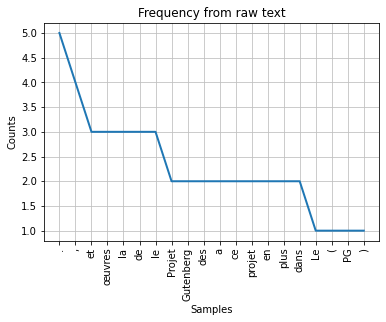

In [ ]:
FreqDist(word_tokenize(corpus)).plot(20, title="Frequency from raw text")

### 4.2 Preprocessed data

In [ ]:
preprocessText(corpus)

'projet gutenberg pg initi volontair numéris archiv œuvr culturel afin création distribu michael hart a démarr projet 1971 plus vieil bibliothequ numer jour plupart œuvr contenu cet collect text complet livr entré domain public projet tent rendr contenu plus accessibl possibl long term format ouvert quel ordin peut comprendr 3 octobr 2015 projet gutenberg a atteint total œuvr collect'

Visualisation of the frequency of each words of the corpus after preprocessing.

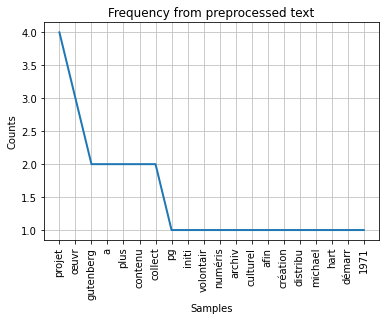

In [ ]:
FreqDist(word_tokenize(preprocessText(corpus))).plot(20, title="Frequency from preprocessed text")

### 4.3 Wordcloud
Wordcloud is a useful way of representing text data, but preprocessing is required first.

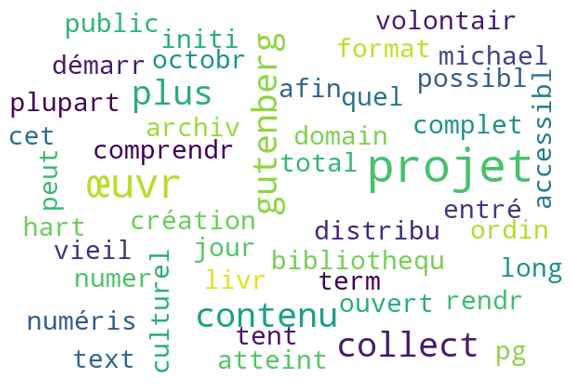

In [ ]:
wordcloud = WordCloud(width=600, height=400, max_font_size=50, max_words=150, background_color="white").generate(preprocessText(corpus))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='spline16')
plt.axis("off")
plt.show()

## 5 Word embedding
You could train your own word embedding (using library like [gensim](https://radimrehurek.com/gensim/models/word2vec.html))  if you want, however you would need a lot of text and you would have to determine a ton of parameters (What is the size of your context, how big do you want your embedding, which algorithm to use, etc.).

Why go through all that hassle when you can just use embeddings that specialist in the field already trained on huge corpus?

[SpaCy](https://spacy.io/usage/models) is a library for NLP that provide such embeddings. 

For this part, specific library and data are required.

In [ ]:
# Download the embeddings
!python3 -m spacy download fr_core_news_sm

In [ ]:
# Load the embeddings
import fr_core_news_sm

### 5.1 Token embeddings
Now that the model is loaded, we can give it a sentence and it will tokenise it and return a list of tokens with a number of attributes.

Run the two following cells and try to understand them : 

In [ ]:
nlp = fr_core_news_sm.load()

doc = nlp("""
Zinédine Zidane, né à Marseille, est un footballeur.
""")

for t in doc:
    print("Text :", t.text,
          "\nPart-of-speech :", t.pos_,
          "\nLemma :", t.lemma_,
          "\nIs punctuation :", t.is_punct,
          "\nIs space :", t.is_space,
          "\nShape / pattern :", t.shape_,
          "\nLabel :", t.tag_,
          "\nType :", t.ent_type_)

Text : 
 
Part-of-speech : SPACE 
Lemma : 
 
Is punctuation : False 
Is space : True 
Shape / pattern : 
 
Label : _SP 
Type : 
Text : Zinédine 
Part-of-speech : NOUN 
Lemma : zinédine 
Is punctuation : False 
Is space : False 
Shape / pattern : Xxxxx 
Label : NOUN__Gender=Fem|Number=Sing 
Type : PER
Text : Zidane 
Part-of-speech : PROPN 
Lemma : Zidane 
Is punctuation : False 
Is space : False 
Shape / pattern : Xxxxx 
Label : PROPN___ 
Type : PER
Text : , 
Part-of-speech : PUNCT 
Lemma : , 
Is punctuation : True 
Is space : False 
Shape / pattern : , 
Label : PUNCT___ 
Type : 
Text : né 
Part-of-speech : VERB 
Lemma : naître 
Is punctuation : False 
Is space : False 
Shape / pattern : xx 
Label : VERB__Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part 
Type : 
Text : à 
Part-of-speech : ADP 
Lemma : à 
Is punctuation : False 
Is space : False 
Shape / pattern : x 
Label : ADP___ 
Type : 
Text : Marseille 
Part-of-speech : PROPN 
Lemma : Marseille 
Is punctuation : False 
Is space : Fa

### 5.2 Entity Recognition

NER (Named Entity Recognition) : give any entity from tokens (if exists)

In [ ]:
doc = nlp("""
Zinédine Zidane, né le 23 juin 1972 à Marseille, est un footballeur international français devenu entraîneur.
Durant sa carrière de joueur, entre 1988 et 2006, il évolue au poste de milieu offensif, comme meneur de jeu.
De janvier 2016 à fin mai 2018, et à partir de mars 2019, il est l'entraîneur du Real Madrid CF, où il a terminé sa carrière de joueur.
""")

for ent in ner.ents:
  print(ent.text, ent.label_)

Zinédine Zidane PER
Marseille LOC
Real Madrid CF ORG




---
Did you love it ? [Please visit my website](http://www.dcid-consulting.fr/) and lets' get in touch for special needs : consultancy, dedicated training, cut-in-the-edge development, etc.  
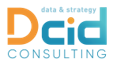Data science | Machine learning | Data analytics | Dataviz  